# EDA on master table Dataset

This notebook performs exploratory data analysis (EDA) master dataset.


## 1. Import Libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 2. Load the Data

In [2]:
# Load the transaction data
data = pd.read_csv('C:/Users/LENOVO/Documents/ML Time Series Forecasting/project/data/master/master_data.csv')

## 3. Display Basic Information

In [3]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              720 non-null    object 
 1   Store                             720 non-null    object 
 2   Department                        720 non-null    object 
 3   Revenue                           720 non-null    float64
 4   day_of_week                       720 non-null    float64
 5   is_weekend                        720 non-null    float64
 6   is_holiday                        720 non-null    float64
 7   day_of_month                      720 non-null    float64
 8   is_month_start                    720 non-null    float64
 9   is_month_end                      720 non-null    float64
 10  Revenue_growth                    719 non-null    float64
 11  cumulative_Revenue                720 non-null    float64
 12  Revenue_

In [4]:
data.describe()

,Revenue,day_of_week,is_weekend,is_holiday,day_of_month,is_month_start,is_month_end,Revenue_growth,cumulative_Revenue,Revenue_per_day_of_week,Previous_day_revenue,Revenue_from_7_days_ago,7_day_rolling_average_of_revenue,Profile,Size,Quantity
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,719.000000,720.000000,720.000000,719.000000,713.000000,714.000000,720.000000,720.000000,720.000000
mean,0.133681,0.495833,0.283333,0.066667,0.484167,0.033333,0.033333,0.193874,0.468281,0.533814,0.133674,0.133007,0.274005,0.500000,0.500000,1818.321792
std,0.102974,0.335272,0.450930,0.249617,0.290124,0.179630,0.179630,0.147629,0.283836,0.349705,0.103045,0.102670,0.168403,0.500348,0.500348,1090.859830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,645.000000
25%,0.056226,0.166667,0.000000,0.000000,0.233333,0.000000,0.000000,0.064338,0.219530,0.236250,0.056220,0.056181,0.149415,0.000000,0.000000,1027.750000
50%,0.099092,0.500000,0.000000,0.000000,0.483333,0.000000,0.000000,0.150735,0.466067,0.699112,0.098807,0.098085,0.244715,0.500000,0.500000,1280.000000
75%,0.197629,0.833333,1.000000,0.000000,0.733333,0.000000,0.000000,0.297794,0.695302,0.858137,0.197689,0.196153,0.359764,1.000000,1.000000,2604.172500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7787.290000


## 5. Understanding data

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date                                0
Store                               0
Department                          0
Revenue                             0
day_of_week                         0
is_weekend                          0
is_holiday                          0
day_of_month                        0
is_month_start                      0
is_month_end                        0
Revenue_growth                      1
cumulative_Revenue                  0
Revenue_per_day_of_week             0
Previous_day_revenue                1
Revenue_from_7_days_ago             7
7_day_rolling_average_of_revenue    6
Profile                             0
Size                                0
Quantity                            0
dtype: int64


In [7]:
# Check for negative values (adjust columns as needed)
print(data[data['Quantity'] < 0])

Empty DataFrame
Columns: [Date, Store, Department, Revenue, day_of_week, is_weekend, is_holiday, day_of_month, is_month_start, is_month_end, Revenue_growth, cumulative_Revenue, Revenue_per_day_of_week, Previous_day_revenue, Revenue_from_7_days_ago, 7_day_rolling_average_of_revenue, Profile, Size, Quantity]
Index: []


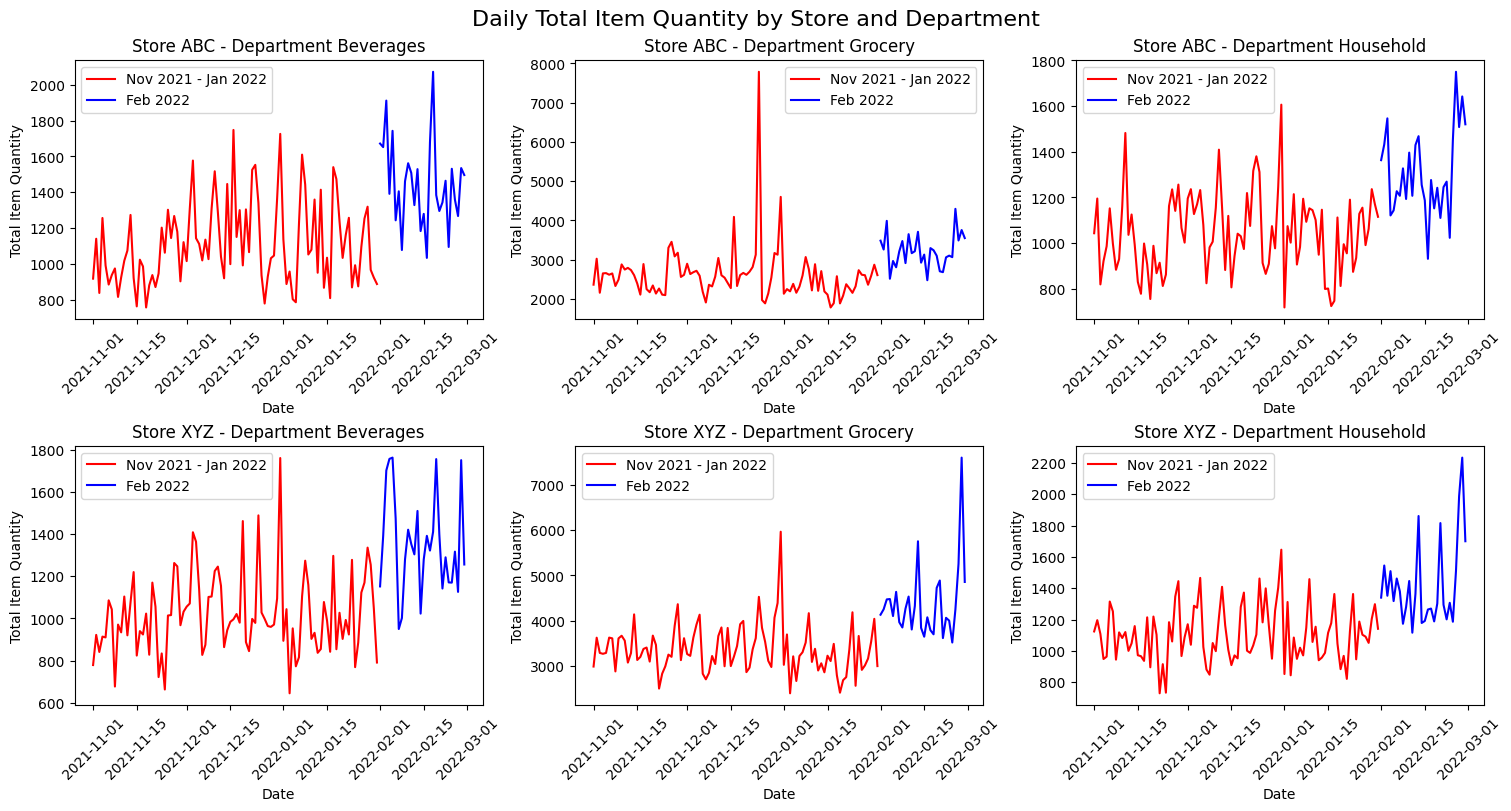

In [11]:
# Ensure date_id is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Replace inf values with NaN to avoid warnings
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define the time periods
period_1_start = pd.to_datetime('2021-11-01')
period_1_end = pd.to_datetime('2022-01-31')

period_2_start = pd.to_datetime('2022-02-01')
period_2_end = pd.to_datetime('2022-02-28')

# Get unique combinations of stores and departments
unique_combinations = data.groupby(['Store', 'Department']).size()

# Set the number of rows and columns for the grid
n_plots = len(unique_combinations)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_plots / n_cols))  # Calculate number of rows needed

# Create a large figure to hold the grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

# Flatten axes for easy indexing (in case of multiple rows)
axes = axes.flatten()

# Loop through each unique store and department combination and plot
for idx, ((Store, Department), group) in enumerate(data.groupby(['Store', 'Department'])):
    # Filter data for the first time period
    period_1_data = group[(group['Date'] >= period_1_start) & (group['Date'] <= period_1_end)]
    
    # Filter data for the second time period
    period_2_data = group[(group['Date'] >= period_2_start) & (group['Date'] <= period_2_end)]
    
    # Plot on the corresponding axis
    sns.lineplot(x='Date', y='Quantity', data=period_1_data, ax=axes[idx], label='Nov 2021 - Jan 2022', color='red')
    sns.lineplot(x='Date', y='Quantity', data=period_2_data, ax=axes[idx], label='Feb 2022', color='blue')
    
    # Set title and labels for each subplot
    axes[idx].set_title(f'Store {Store} - Department {Department}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Total Item Quantity')
    
    # Rotate x-axis labels by 45 degrees
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots if n_plots is not a perfect multiple of n_cols
for i in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

# Save the entire figure with all the plots
fig.suptitle('Daily Total Item Quantity by Store and Department', fontsize=16)
# Show the grid of plots
plt.show()


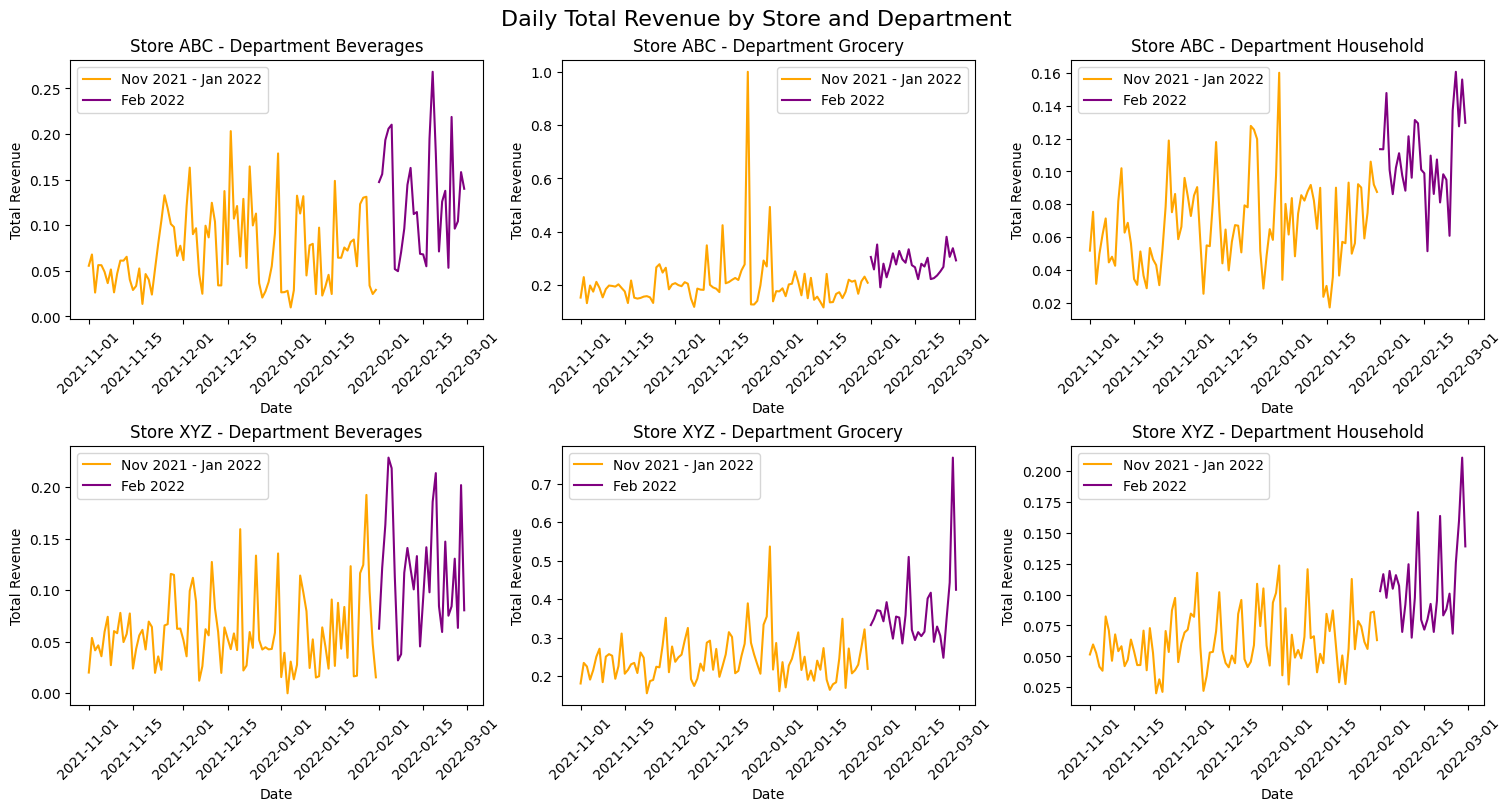

In [13]:
# Ensure date_id is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Replace inf values with NaN to avoid warnings
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define the time periods
period_1_start = pd.to_datetime('2021-11-01')
period_1_end = pd.to_datetime('2022-01-31')

period_2_start = pd.to_datetime('2022-02-01')
period_2_end = pd.to_datetime('2022-02-28')

# Get unique combinations of stores and departments
unique_combinations = data.groupby(['Store', 'Department']).size()

# Set the number of rows and columns for the grid
n_plots = len(unique_combinations)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_plots / n_cols))  # Calculate number of rows needed

# Create a large figure to hold the grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

# Flatten axes for easy indexing (in case of multiple rows)
axes = axes.flatten()

# Loop through each unique store and department combination and plot
for idx, ((Store, Department), group) in enumerate(data.groupby(['Store', 'Department'])):
    # Filter data for the first time period
    period_1_data = group[(group['Date'] >= period_1_start) & (group['Date'] <= period_1_end)]
    
    # Filter data for the second time period
    period_2_data = group[(group['Date'] >= period_2_start) & (group['Date'] <= period_2_end)]
    
    # Plot on the corresponding axis
    sns.lineplot(x='Date', y='Revenue', data=period_1_data, ax=axes[idx], label='Nov 2021 - Jan 2022', color='orange')
    sns.lineplot(x='Date', y='Revenue', data=period_2_data, ax=axes[idx], label='Feb 2022', color='purple')
    
    # Set title and labels for each subplot
    axes[idx].set_title(f'Store {Store} - Department {Department}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Total Revenue')
    
    # Rotate x-axis labels by 45 degrees
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots if n_plots is not a perfect multiple of n_cols
for i in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

# Save the entire figure with all the plots
fig.suptitle('Daily Total Revenue by Store and Department', fontsize=16)

# Show the grid of plots
plt.show()


<Figure size 1000x400 with 0 Axes>

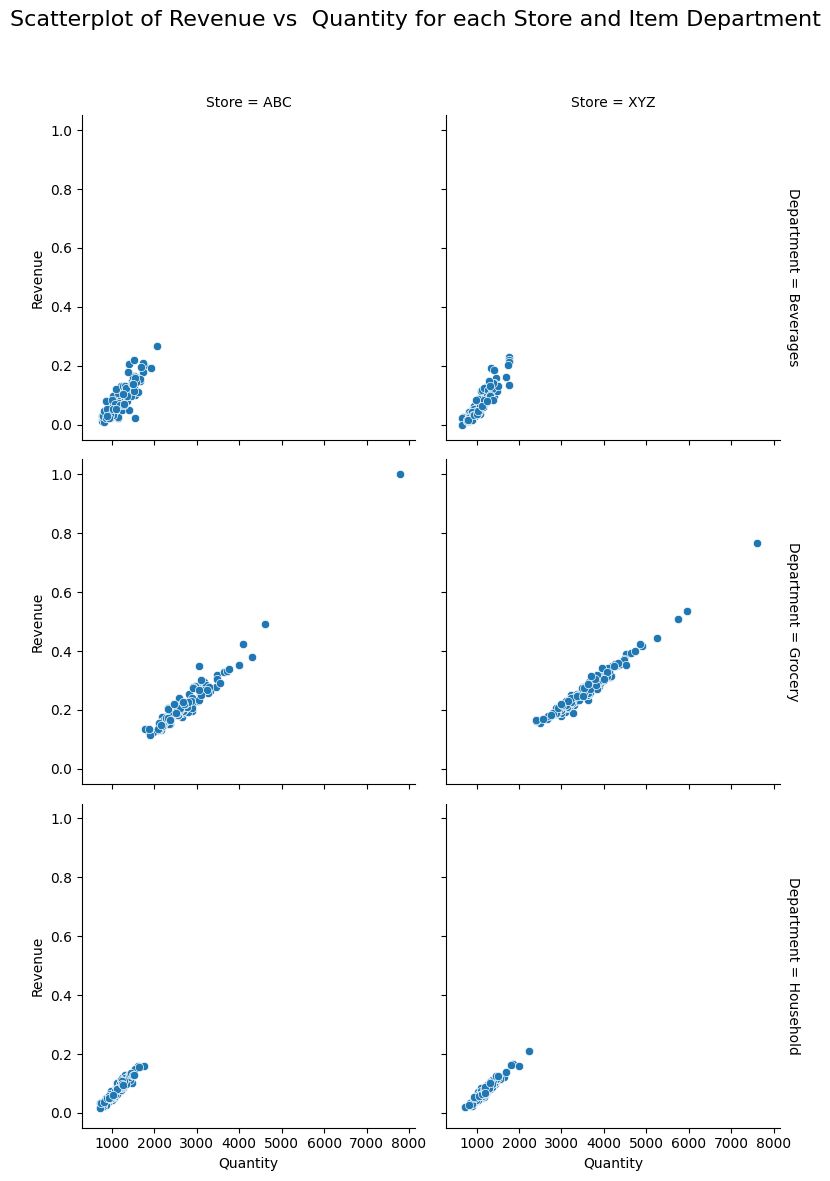

In [26]:
# Create the FacetGrid with scatter plots for each store and item_dept combination
g = sns.FacetGrid(data, col='Store', row='Department', margin_titles=True, height=4)
g.map(sns.scatterplot, 'Quantity', 'Revenue')

# Adding titles and labels
g.fig.suptitle('Scatterplot of Revenue vs  Quantity for each Store and Item Department', fontsize=16)
g.set_axis_labels('Quantity', 'Revenue')

# Adjust the layout to avoid overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Show the plot
plt.show()

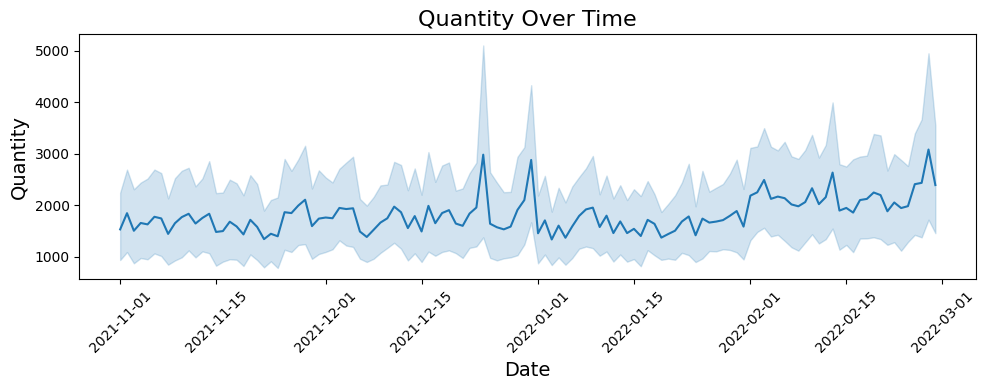

In [20]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='Quantity', data=data)
plt.title('Quantity Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


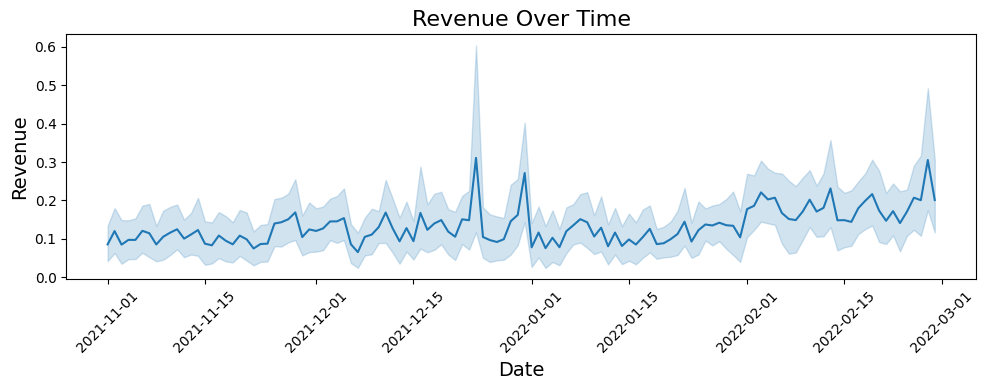

In [21]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='Revenue', data=data)
plt.title('Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


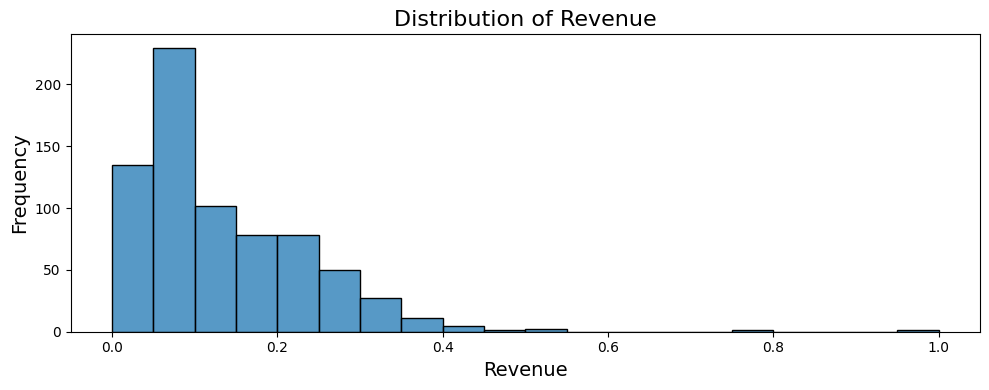

In [24]:
plt.figure(figsize=(10, 4))
sns.histplot(data['Revenue'], bins=20)
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


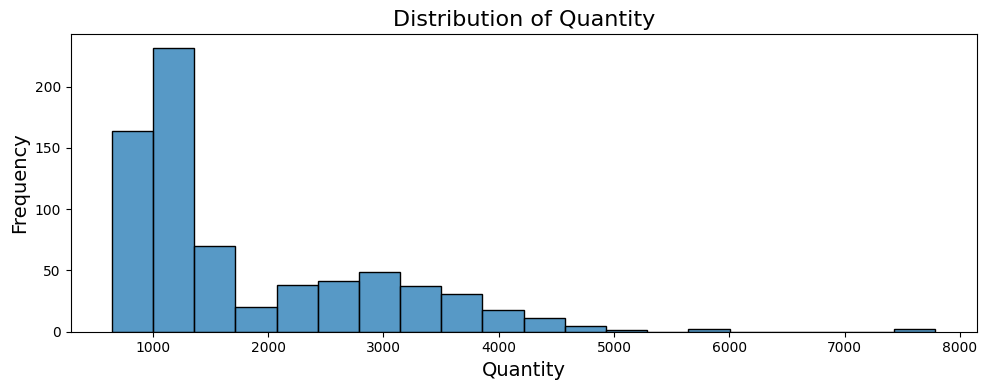

In [25]:
plt.figure(figsize=(10, 4))
sns.histplot(data['Quantity'], bins=20)
plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


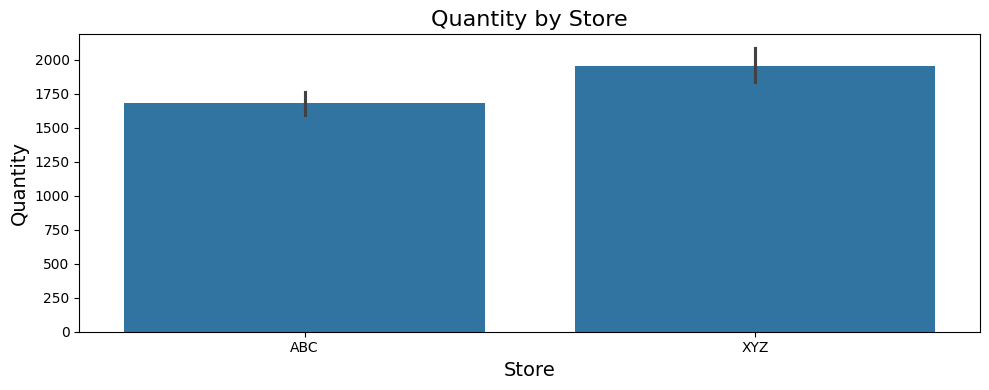

In [31]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Store', y='Quantity', data=data)
plt.title('Quantity by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.tight_layout()
plt.show()



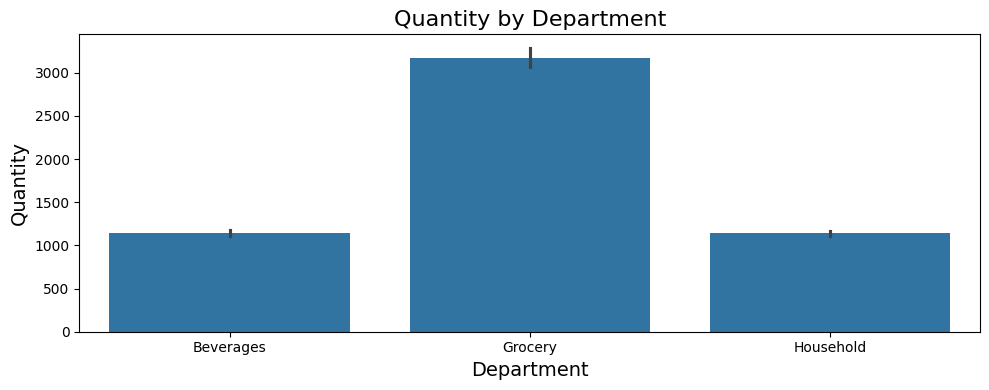

In [32]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Department', y='Quantity', data=data)
plt.title('Quantity by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.tight_layout()
plt.show()


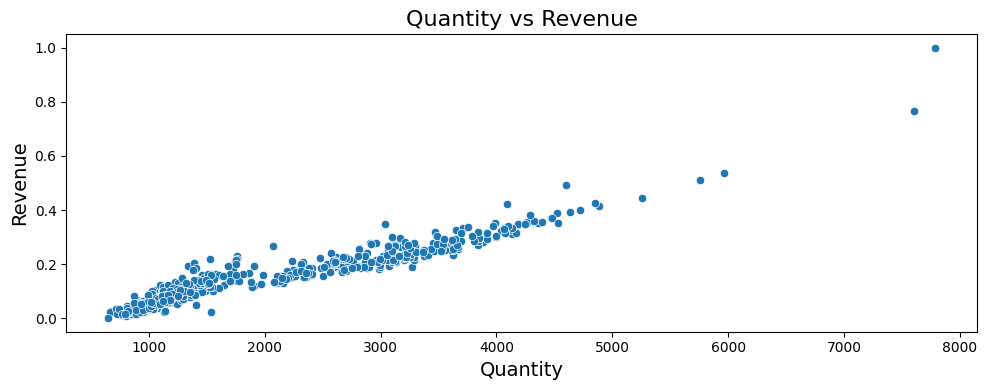

In [35]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Quantity', y='Revenue', data=data)
plt.title('Quantity vs Revenue', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.tight_layout()
plt.show()


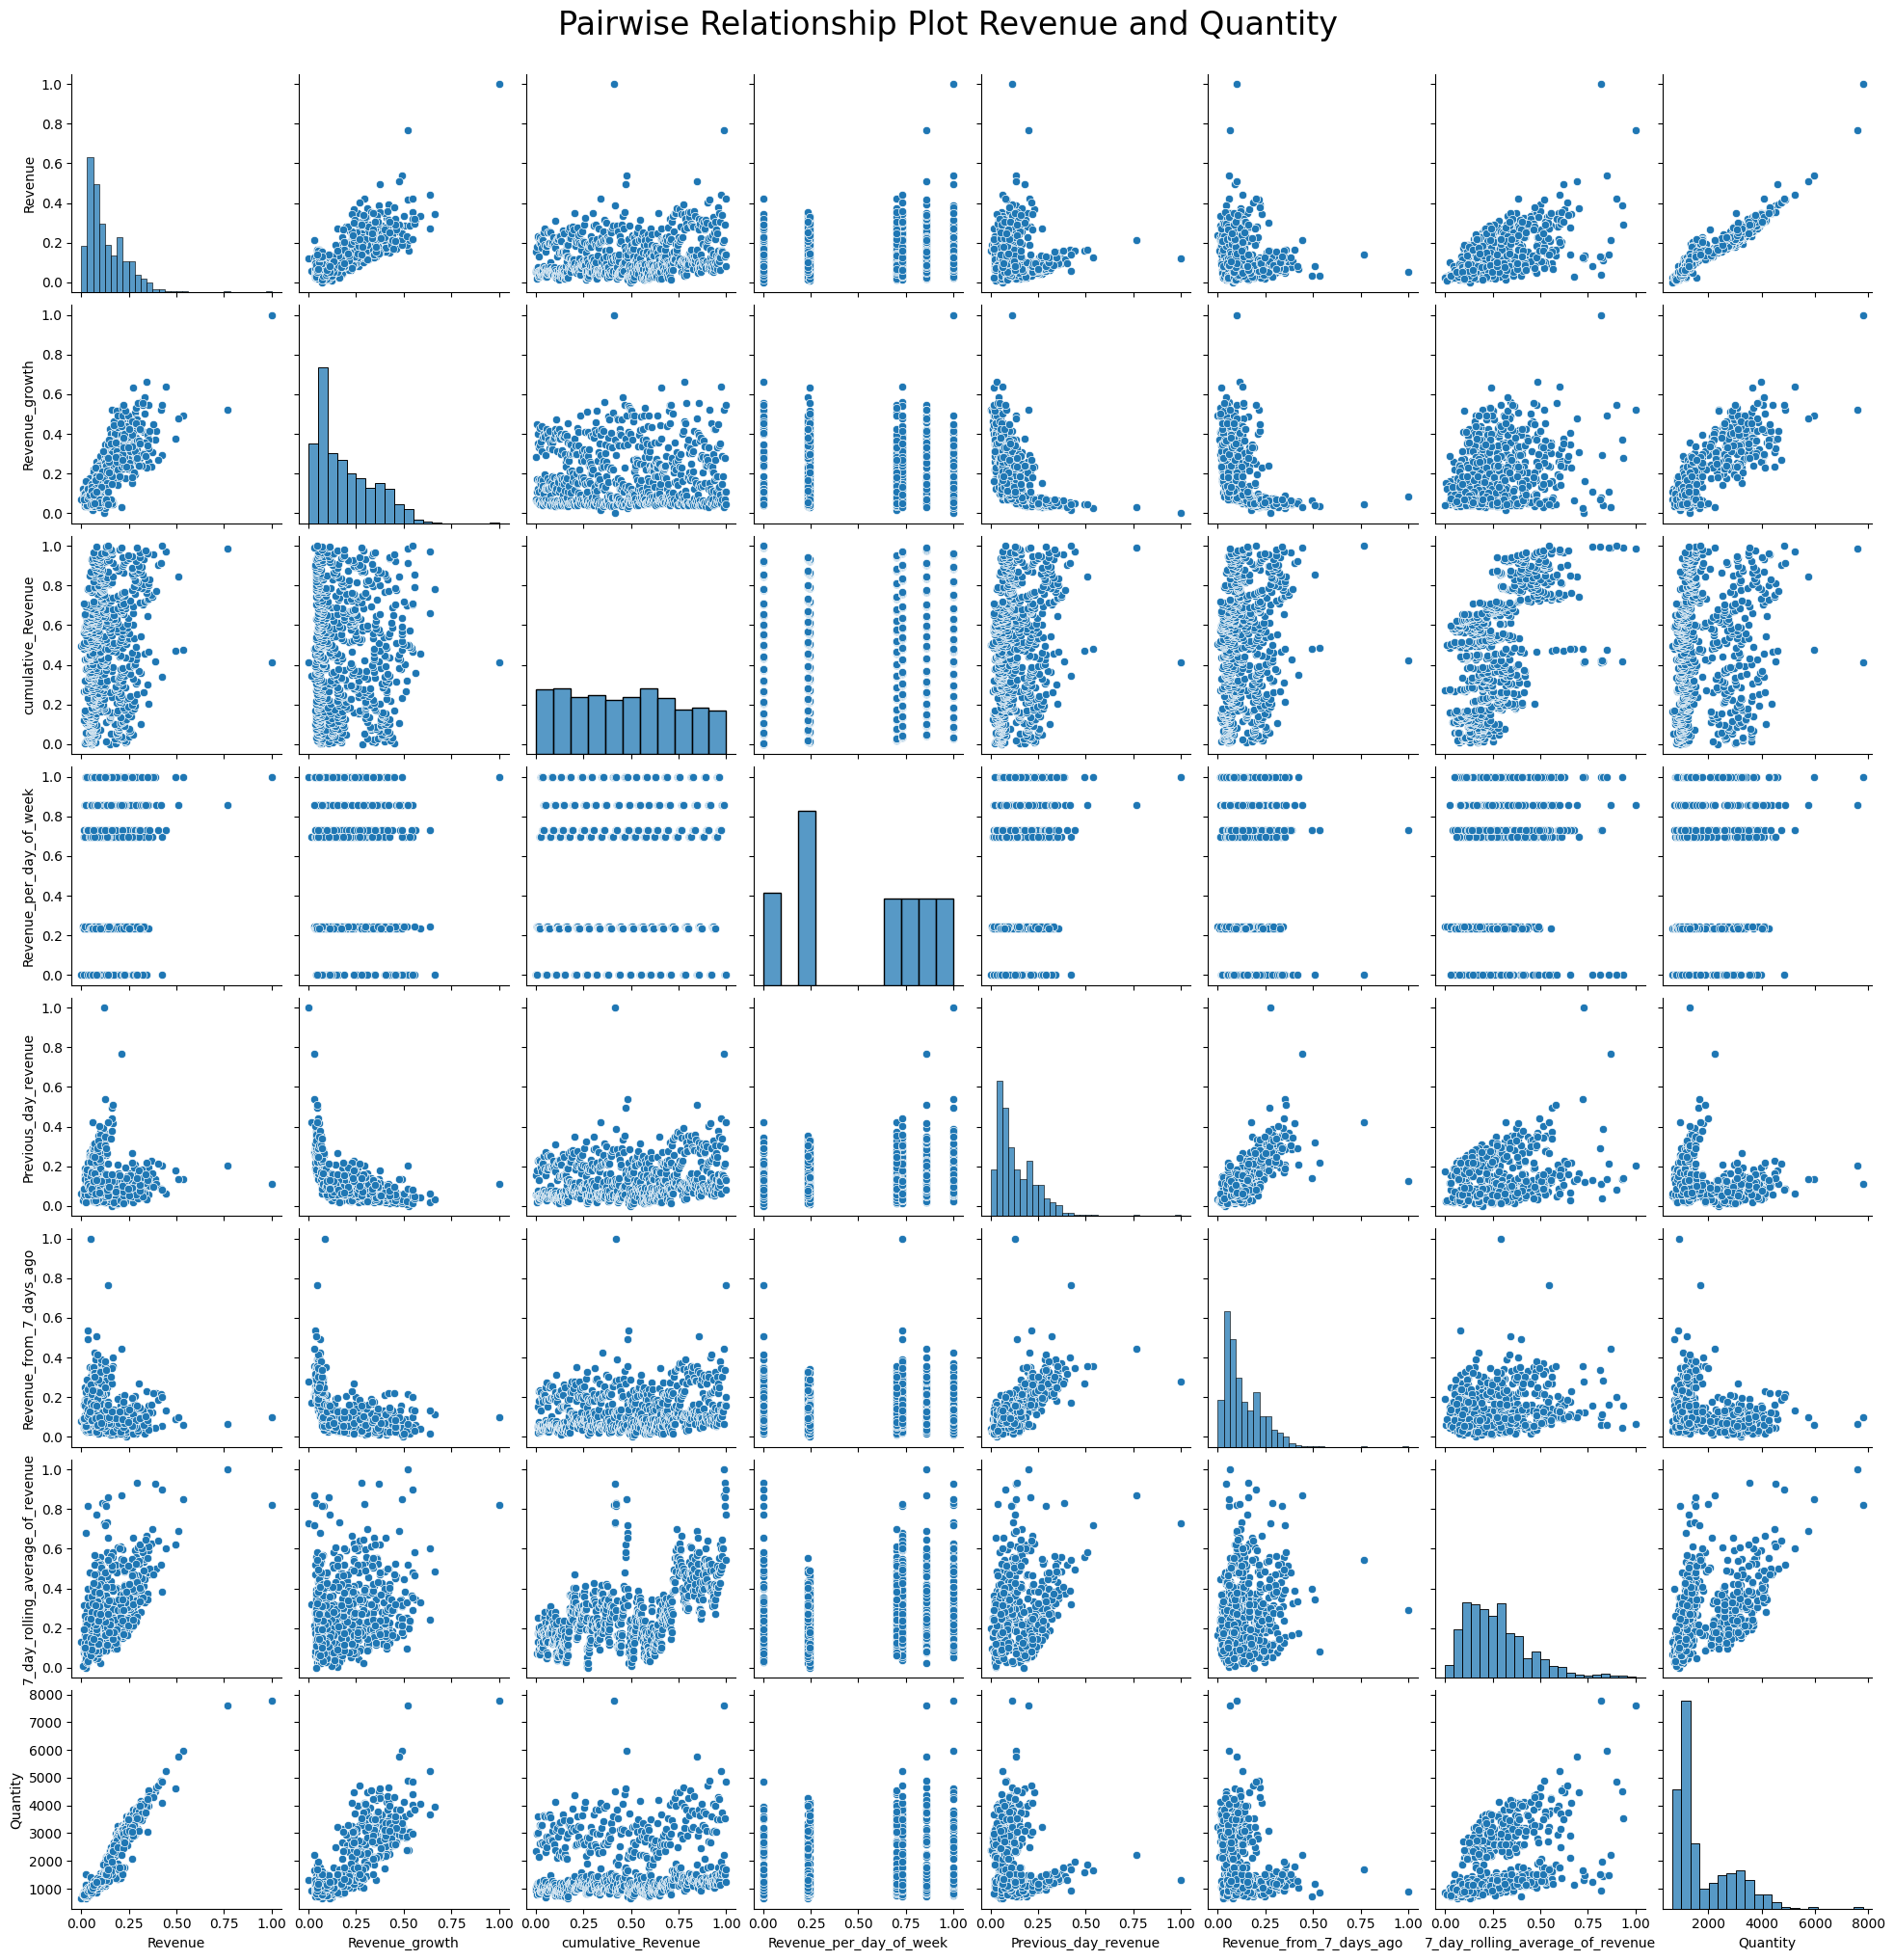

In [48]:
g = sns.pairplot(data[['Revenue', 'Revenue_growth', 'cumulative_Revenue', 'Revenue_per_day_of_week',
                       'Previous_day_revenue', 'Revenue_from_7_days_ago', '7_day_rolling_average_of_revenue','Quantity']],
                 height=2.5)

# Set the title for the entire grid
g.fig.suptitle('Pairwise Relationship Plot - Revenue features and Quantity', fontsize=24, y=1.02)

# Show the plot
plt.show()


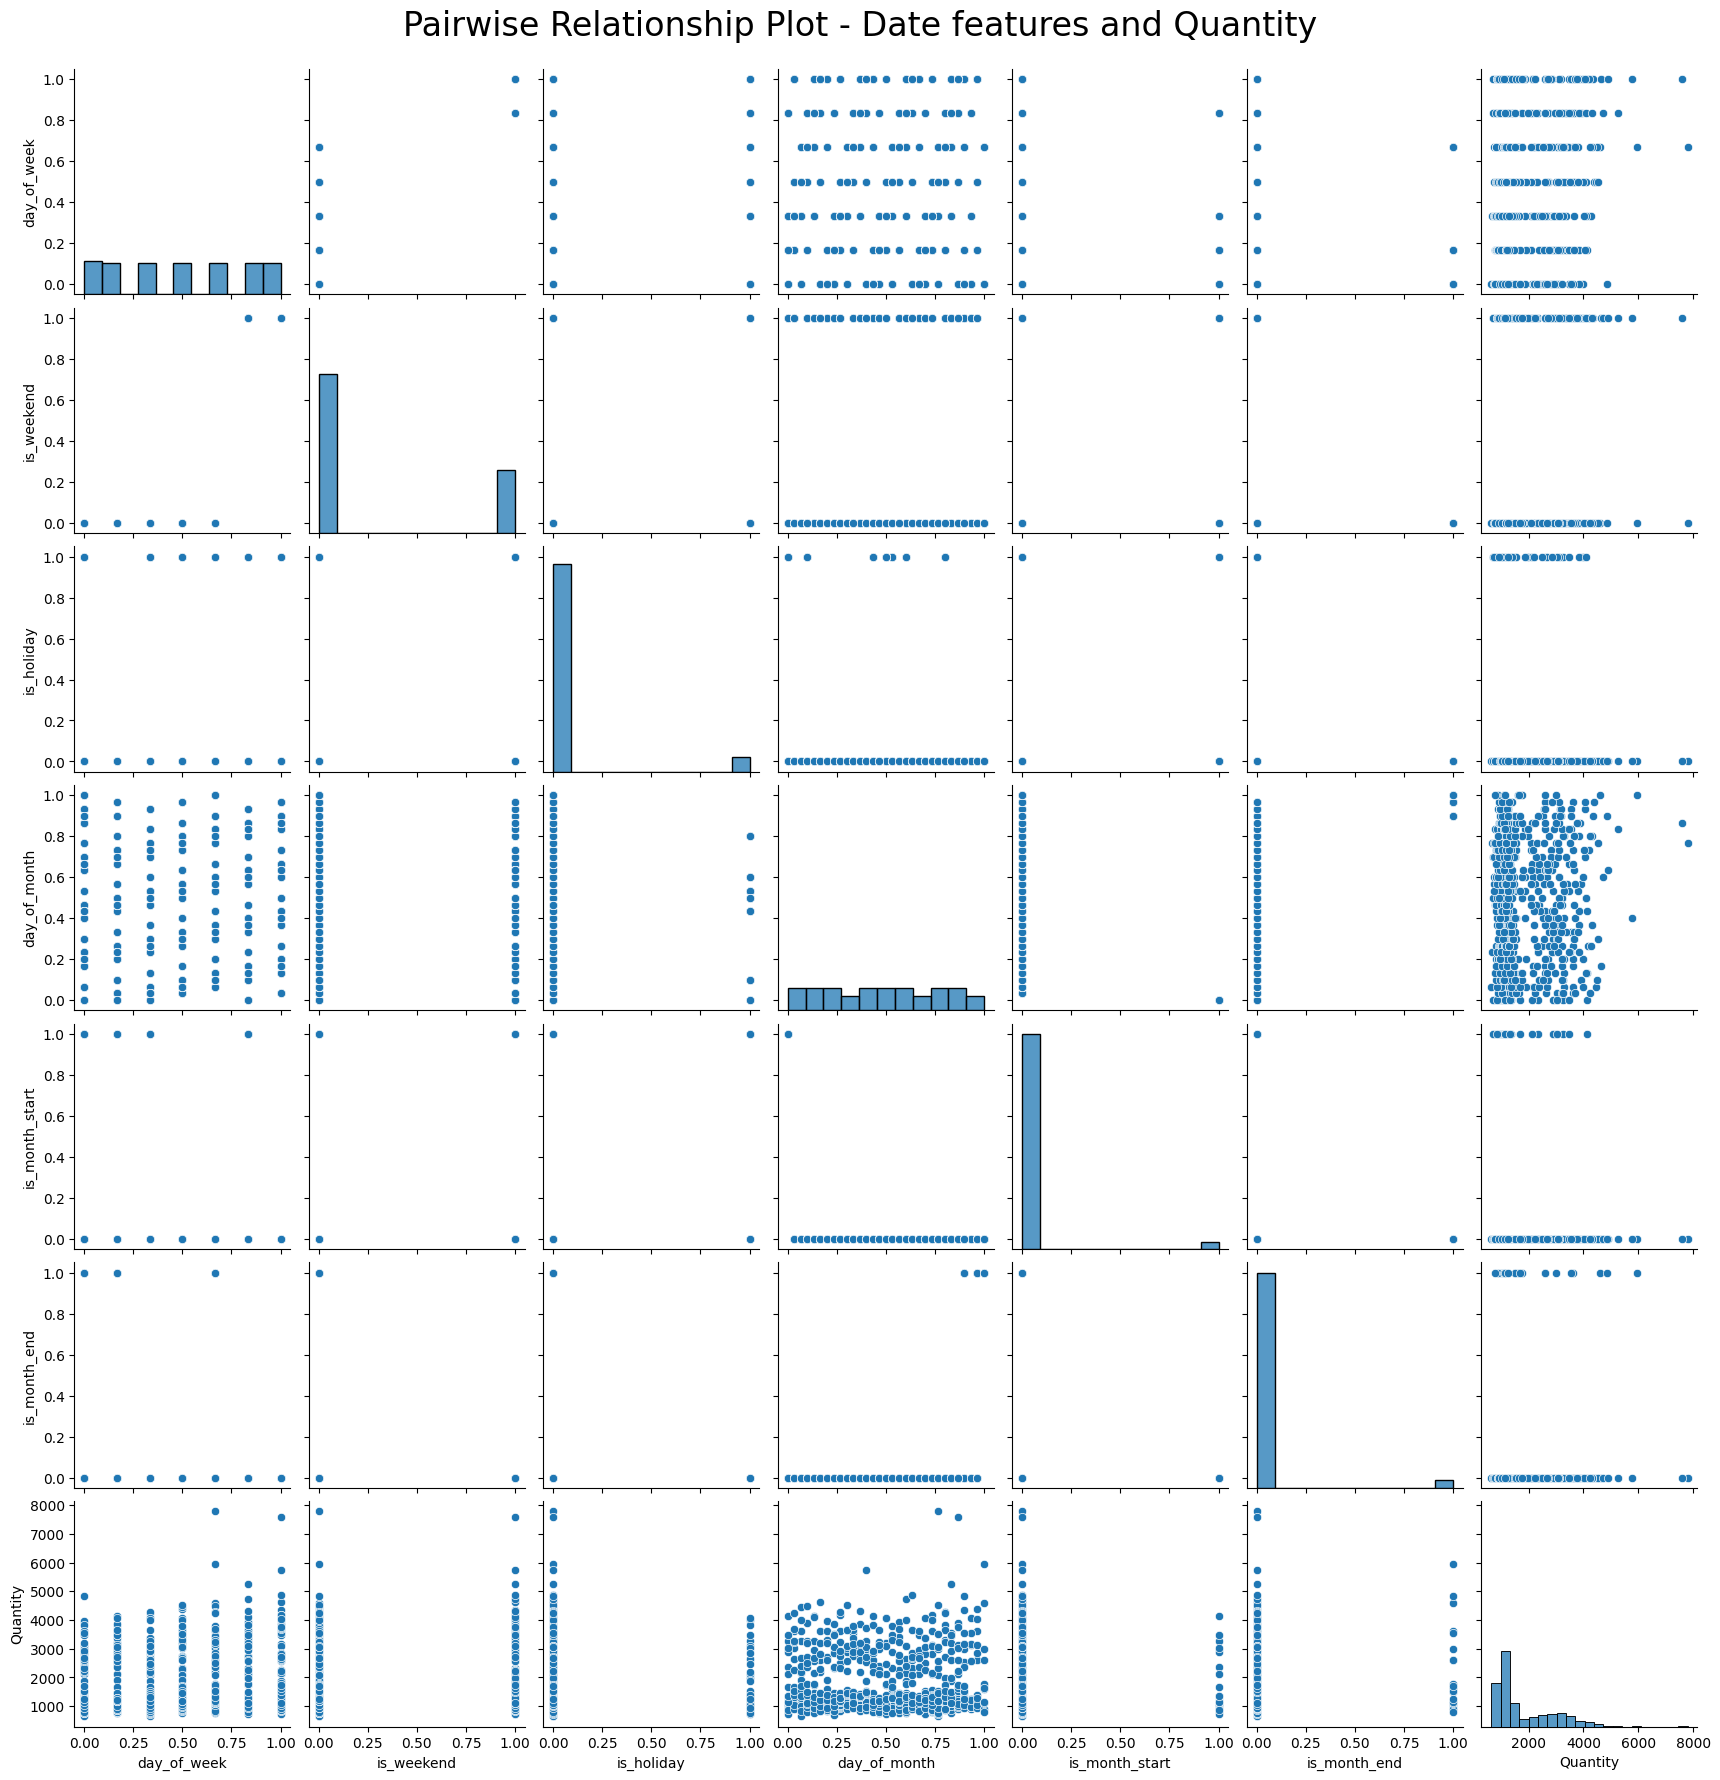

In [51]:
g = sns.pairplot(data[['Date', 'day_of_week', 'is_weekend', 'is_holiday',
                       'day_of_month', 'is_month_start', 'is_month_end','Quantity']],
                 height=2.5)

# Set the title for the entire grid
g.fig.suptitle('Pairwise Relationship Plot - Date features and Quantity', fontsize=24, y=1.02)

# Show the plot
plt.show()


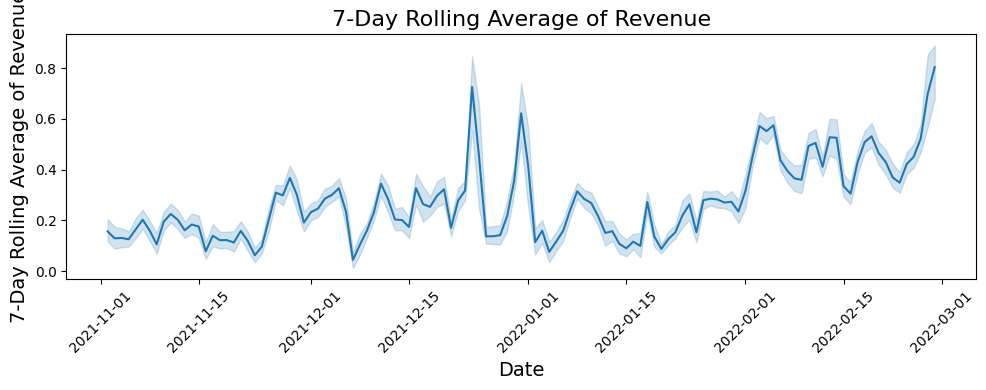

In [37]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='7_day_rolling_average_of_revenue', data=data)
plt.title('7-Day Rolling Average of Revenue', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('7-Day Rolling Average of Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


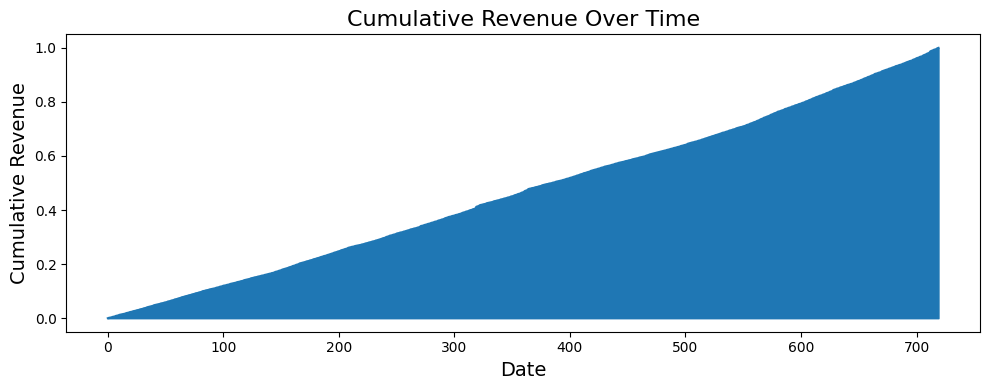

In [39]:
plt.figure(figsize=(10, 4))
data['cumulative_Revenue'].plot(kind='area')
plt.title('Cumulative Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Revenue', fontsize=14)
plt.tight_layout()
plt.show()
